In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import sys
import csv

In [2]:
#!cd data; tar -xzf GSE171892_RAW.tar

In [3]:
pd.set_option('display.max_rows',1000)

# Preparing heart data

In [10]:
adataH = sc.read_h5ad("data/Circulatory/Heart.h5ad")
adataH #not normalised

AnnData object with n_obs × n_vars = 30539 × 32732
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions', 'leiden_scArches'
    var: 'gene_name-new', 'gene_name_scRNA-0-original', 'gene_name_snRNA-1-original', 'gene_name_multiome-2-original', 'ensemblid'
    uns: 'age_colors', 'cell_or_nuclei_colors', 'cell_state_colors', 'cell_type_colors', 'donor_color

In [11]:
adataH.obs['cell_or_nuclei']

barcode
HCAHeart7656534_GACGCGTAGAGGGCTT-1    Cell
HCAHeart7656534_CCTAGCTCATTGGCGC-1    Cell
HCAHeart7656534_TCTTTCCAGCCCAGCT-1    Cell
HCAHeart7656534_TGACTAGTCAACGAAA-1    Cell
HCAHeart7656534_GCGCAACAGGGAACGG-1    Cell
                                      ... 
HCAHeart7850551_ACTGAGTGTACCGGCT      Cell
HCAHeart7850551_GTGAAGGTCAGAGGTG      Cell
HCAHeart7850551_TGCCCATCAGTCGTGC      Cell
HCAHeart7850551_GGGATGAAGTTTAGGA      Cell
HCAHeart7850551_ACCAGTAAGGCCCGTT      Cell
Name: cell_or_nuclei, Length: 30539, dtype: category
Categories (1, object): ['Cell']

Max count: 14990.0
Min count: 0.0


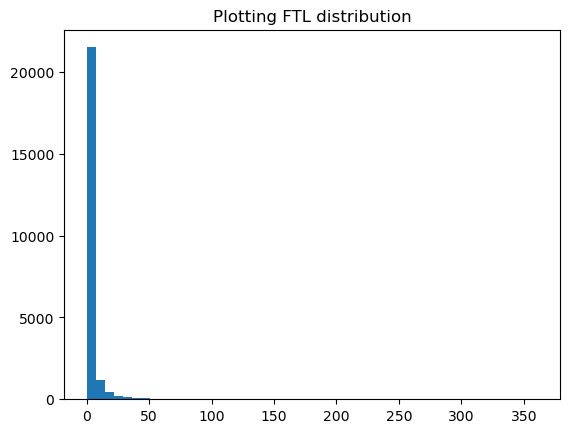

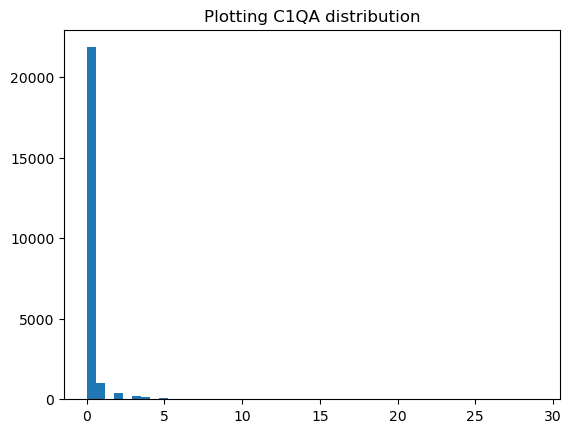

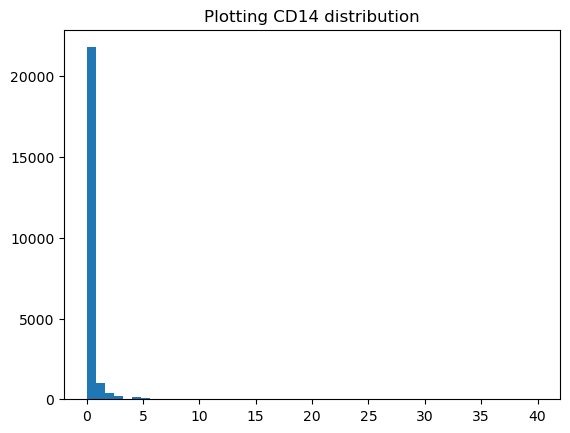

In [5]:
genes = ['FTL','C1QA','CD14']

for i, gene in enumerate(genes):

    index = np.where(adataH.var_names == gene) [0][0]
    
    data1 = pd.DataFrame(adataH.X[:, index].todense())
    data1.rename(columns={data1.columns[0]: gene}, inplace=True)
    if i == 0:
        print('Max count: {m}'.format(m=np.max(adataH.X)))
        print('Min count: {m}'.format(m=np.min(adataH.X)))
    plt.hist(data1.loc[:, gene], bins=50)
    plt.title(f'Plotting {gene} distribution')
    plt.show()
    plt.close()

In [12]:
adataH2 = sc.read_h5ad("data/Circulatory/BloodH2.h5ad")
adataH2 #not normalised

AnnData object with n_obs × n_vars = 40806 × 24074
    obs: 'batch', 'library', 'donor', 'organ'
    var: 'gene_ids'

In [13]:
adataP = sc.read_10x_mtx('data/filtered_gene_bc_matrices/hg19/',var_names='gene_symbols',cache=True)
adataP.var_names_make_unique()
adataP

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [14]:
adataC = {"adataH": adataH, "adataH2": adataH2, "adataP": adataP}
adataC = ad.concat(adataC, fill_value=0,  join="outer")

# Preparing Brain Data

In [15]:
adataB = sc.read_h5ad("data/Brain/BrainGlio.h5ad")

In [16]:
adataBZ = sc.read_h5ad("data/Brain/Glioadj.h5ad")

In [17]:
adataN = {"adataB": adataB, "adataBZ": adataBZ}
adataN = ad.concat(adataN, fill_value=0,  join="outer")

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/anndata/_core/merge.py:1111: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(


# Preparing Skin Data

In [18]:
adataSH = sc.read_h5ad("data/Skin/HaniffaSkin.h5ad")

In [10]:
adataSH

AnnData object with n_obs × n_vars = 40244 × 23310
    obs: 'SampleID', 'Sample', 'Tissue_layer', 'Flow_gate', 'Cell_group', 'Cell_type'

In [19]:
adataS = sc.read_10x_mtx('data/Skin/skinfiltered',var_names='gene_symbols',cache=True)
adataS.var_names_make_unique()
adataS

AnnData object with n_obs × n_vars = 16062 × 32738
    var: 'gene_ids'

In [20]:
adataS = {"adataSH": adataSH, "adataS": adataS}
adataS = ad.concat(adataS, fill_value=0,  join="outer")
adataS.var_names_make_unique()
adataS

AnnData object with n_obs × n_vars = 56306 × 34558
    obs: 'SampleID', 'Sample', 'Tissue_layer', 'Flow_gate', 'Cell_group', 'Cell_type'

# Preparing Musco Data

In [21]:
adataM = sc.read_h5ad("data/Musco/Musco.h5ad")

In [22]:
adataMZ = sc.read_h5ad("data/Musco/MuscoMZ.h5ad")

In [23]:
adataM = {"adataM": adataM, "adataMZ": adataMZ}
adataM= ad.concat(adataM, fill_value=0,  join="outer")

# Merging by study

In [16]:
adatas = {"Heart": adataH,"Blood":adataH2,"PBMC":adataP, "Brain-PerrpheralTumour": adataB, "BrainGlio": adataBZ, "SkinHet": adataSH,"MuscoAtlas": adataM, "MuscoB": adataMZ}
adatas = ad.concat(adatas, label="dataset_name", fill_value=0,  join="outer") #outer or inner?
adatas.var_names_make_unique()
adatas.obs_names_make_unique()

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/anndata/_core/merge.py:1111: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(
/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['AACAAAGAGAAACTCA-1-1', 'AACGGGACAAGTGCAG-1-1', 'AATCGACCAAGCAATA-1-1', 'AATTCCTTCGCCAGAC-1-1', 'ACAGAAACAAGGTTGG-1-1']
  warnings.warn(


In [17]:
adatas

AnnData object with n_obs × n_vars = 188923 × 52533
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions', 'leiden_scArches', 'library', 'organ', 'author', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontol

# Merging by system

In [24]:
adatas = {"Circulatory": adataC, "Nervous": adataN, "Skin": adataS,"Musco": adataM}
adatas = ad.concat(adatas, label="dataset_name", fill_value=0,  join="outer") #outer or inner?

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [26]:
adatas

AnnData object with n_obs × n_vars = 227846 × 52533
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions', 'leiden_scArches', 'library', 'organ', 'author', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontol

In [27]:
adatas.var_names_make_unique()

In [28]:
adatas.obs_names_make_unique()

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['AACAAAGAGAAACTCA-1-1', 'AACGGGACAAGTGCAG-1-1', 'AATCGACCAAGCAATA-1-1', 'AATTCCTTCGCCAGAC-1-1', 'ACAGAAACAAGGTTGG-1-1']
  warnings.warn(


# Post merged processing

In [29]:
adatas2 = adatas

In [30]:
adatas2

AnnData object with n_obs × n_vars = 227846 × 52533
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions', 'leiden_scArches', 'library', 'organ', 'author', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontol

In [31]:
sc.pp.normalize_total(adatas2, target_sum=1e4)

In [32]:
sc.pp.log1p(adatas2)

In [33]:
del adatas2.obs['ATRX']

In [34]:
del adatas2.obs['PTEN']

In [35]:
del adatas2.obs['TERT']

In [36]:
adatas2

AnnData object with n_obs × n_vars = 227846 × 52533
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions', 'leiden_scArches', 'library', 'organ', 'author', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontol

In [ ]:
adatas2.write('Circulatory_Nervous_SKIN_Musco.h5ad', compression='gzip')

# Data manipulaton and location labelling

In [ ]:
#adatas2 = sc.read_h5ad("data/heart_brainnuclei.h5ad")

In [37]:
DDP = pd.read_csv("geneVSorgans.csv")

In [ ]:
#sc.pl.umap(adatas2, color='cell_type')

In [38]:
pbmcgen = adatas2.var_names.tolist()
dddgen = DDP["gene symbol"].tolist()

# Calculate the number of overlapping genes
overlap_count = len(set(pbmcgen).intersection(dddgen))

print("Number of overlapping genes:", overlap_count)

Number of overlapping genes: 2325


In [39]:
genes = list(DDP['gene symbol'])

In [40]:
# Filter rows for Skin
Skin =  DDP.loc[DDP['Skin']==True]
Skin = Skin["gene symbol"]
Skin = list(Skin)

# Filter rows for Nervous
Nervous = DDP.loc[(DDP['Peripheral'] == True) | (DDP['Brain'] == True)]
Nervous = Nervous["gene symbol"]
Nervous = list(Nervous)  

# Filter rows for Musco
Musco = DDP.loc[(DDP['Skeleton'] == True) | (DDP['Musculature'] == True)]
Musco = Musco["gene symbol"]
Musco = list(Musco)  

# Filter rows for Circulatory
Circulatory = DDP.loc[(DDP['Heart'] == True) | (DDP['Bone Marrow'] == True)]
Circulatory = Circulatory["gene symbol"]
Circulatory = list(Circulatory) 

In [41]:
dict1 = {
    'Muscoskeletal' : Musco,
}
dict2 = {
    'Skin' : Skin,
}
dict3 = {
    'Nervous' : Nervous,
}
dict4 = {
    'Circulatory' : Circulatory
}

In [42]:
dictF = {
    'Muscoskeletal' : [v for v in dict1['Muscoskeletal'] if v in adatas2.var_names],
    'Skin' : [v for v in dict2['Skin'] if v in adatas2.var_names],
    'Nervous' : [v for v in dict3['Nervous'] if v in adatas2.var_names],
    'Circulatory' : [v for v in dict4['Circulatory'] if v in adatas2.var_names]
}

In [43]:
dictN = {
    'Nervous' : [v for v in dict3['Nervous'] if v in adatas2.var_names]
}
dictS = {
    'Skin' : [v for v in dict2['Skin'] if v in adatas2.var_names]
}
dictM = {
    'Muscoskeletal' : [v for v in dict1['Muscoskeletal'] if v in adatas2.var_names]
}
dictC = {
    'Circulatory' : [v for v in dict4['Circulatory'] if v in adatas2.var_names]
}

# Plotting

In [35]:
sc.pp.calculate_qc_metrics(adatas2, percent_top=None, log1p=False, inplace=True)

In [51]:
adatas2.var

,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
5S_rRNA,0,0.000000,100.000000,0.000000
5_8S_rRNA_ENSG00000273730,0,0.000000,100.000000,0.000000
7SK,0,0.000000,100.000000,0.000000
7SK-1,98,0.000331,99.948127,62.486771
7SK-2,5107,0.019838,97.296782,3747.843018
...,...,...,...,...
hsa-mir-335,70,0.000225,99.962948,42.599888
hsa-mir-490,0,0.000000,100.000000,0.000000
hsa-mir-7515,0,0.000000,100.000000,0.000000
hsa-mir-8072,3884,0.014268,97.944136,2695.636719


/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:842: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


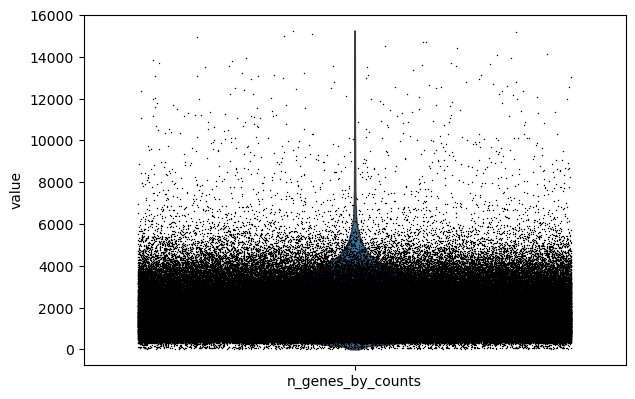

In [36]:
sc.pl.violin(adatas2, ['n_genes_by_counts'],
             jitter=0.4, save='ngenesbycountsALL.pdf')

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:842: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


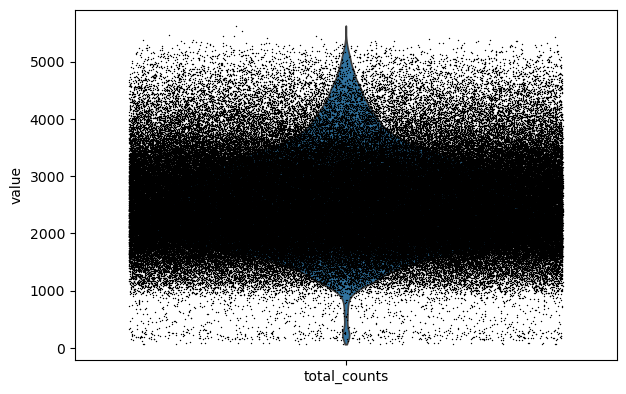

In [37]:
sc.pl.violin(adatas2, ['total_counts'],
             jitter=0.4, save='totalcountsALL.pdf')

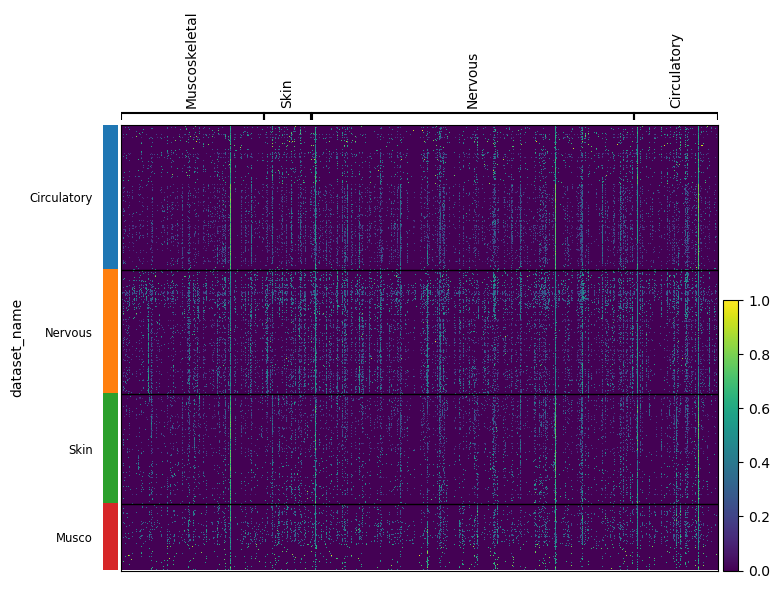

In [44]:
sc.pl.heatmap(adatas2, groupby='dataset_name', use_raw=False, var_names=dictF, standard_scale='var',save="V10ALL.pdf")

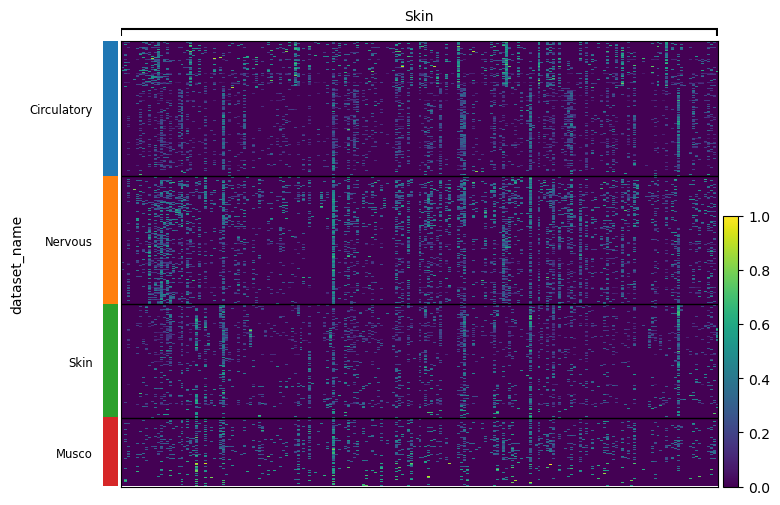

In [39]:
sc.pl.heatmap(adatas2, groupby='dataset_name', use_raw=False, var_names=dictS, standard_scale='var', show_gene_labels=False, save="V10Skin.pdf")

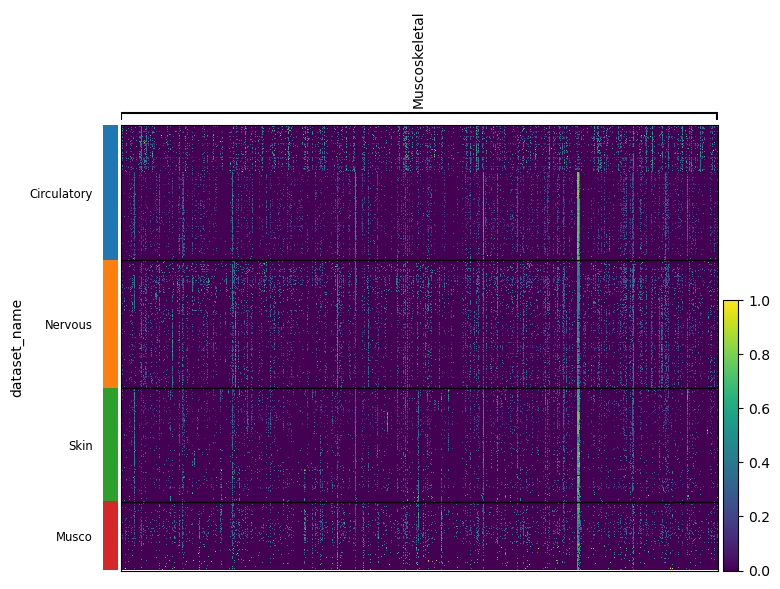

In [40]:
sc.pl.heatmap(adatas2, groupby='dataset_name', use_raw=False, var_names=dictM, standard_scale='var', show_gene_labels=False, save="V8Musco.pdf")

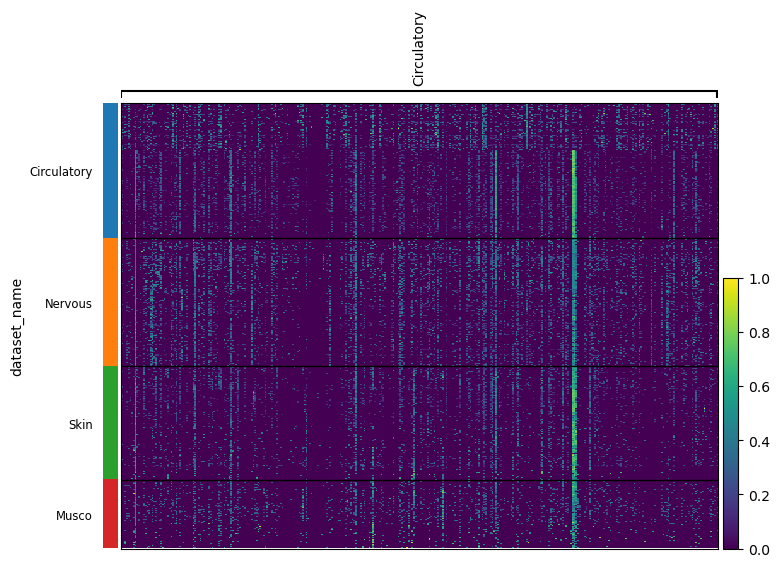

In [41]:
sc.pl.heatmap(adatas2, groupby='dataset_name', use_raw=False, var_names=dictC, standard_scale='var', show_gene_labels=False, save="V8Circulatory.pdf")

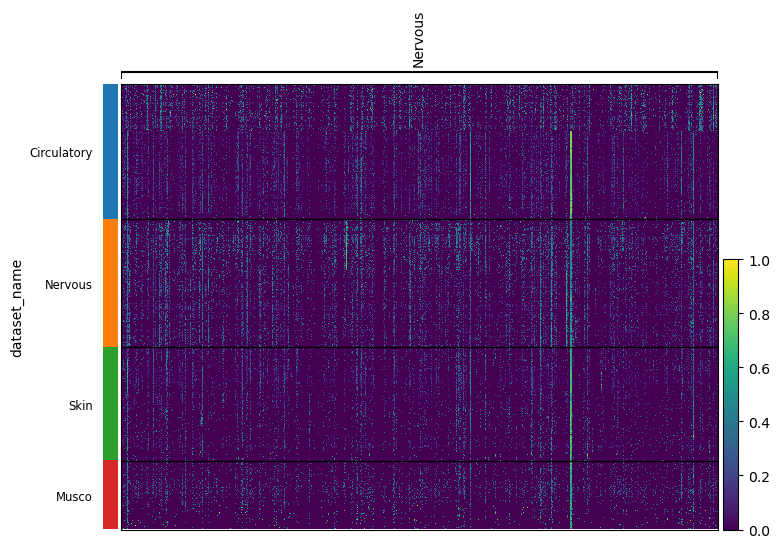

In [42]:
sc.pl.heatmap(adatas2, groupby='dataset_name', use_raw=False, var_names=dictN, standard_scale='var', show_gene_labels=False, save="V8Nervous.pdf")

In [ ]:
sc.pl.dotplot(adatas2, groupby='dataset_name', use_raw=False, var_names=dictF, standard_scale='var', save="V8FULLDOT.pdf")

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


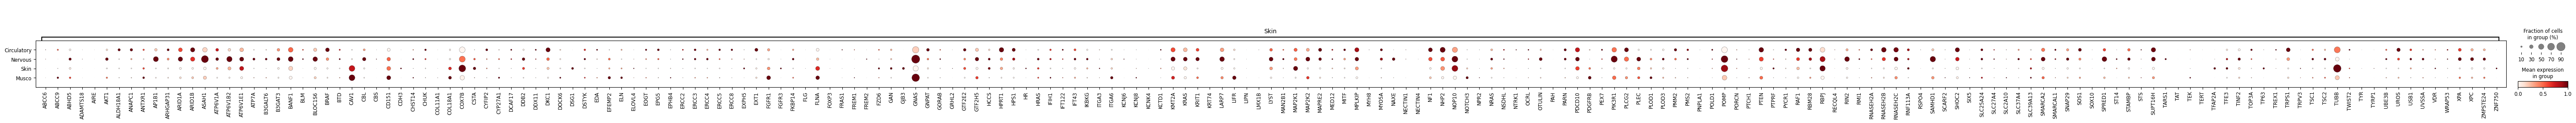

In [43]:
sc.pl.dotplot(adatas2, groupby='dataset_name', use_raw=False, var_names=dictS, standard_scale='var', save="V8SkinDOT.pdf")

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


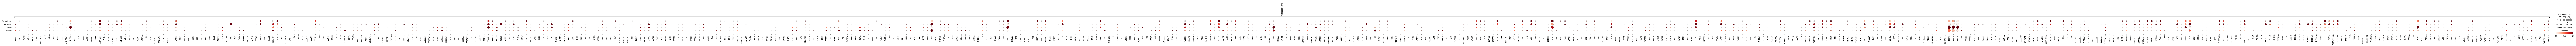

In [44]:
sc.pl.dotplot(adatas2, groupby='dataset_name', use_raw=False, var_names=dictM, standard_scale='var', save="V8MuscoDOT.pdf")

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


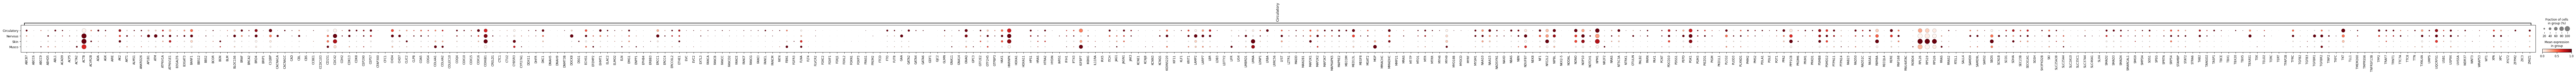

In [45]:
sc.pl.dotplot(adatas2, groupby='dataset_name', use_raw=False, var_names=dictC, standard_scale='var', save="V8CircDOT.pdf")

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


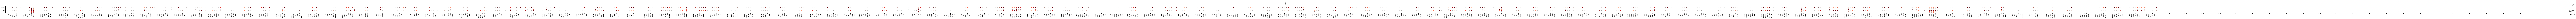

In [46]:
sc.pl.dotplot(adatas2, groupby='dataset_name', use_raw=False, var_names=dictN, standard_scale='var', save="V8NervousDOT.pdf")